In [1]:
from CF.cf_recommender_user import cf_recommender_user
from utils.evaluator.evaluator import evaluator
from utils.submission_helper import submission_helper
from utils.data_manager.data_manager import data_manager
from utils.data_manager.splitter import splitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
training, validation, test = splitter().get_train_evaluation_test(percentage_of_training_data=0.6,
                                                                  percentage_of_validation_data=0.2)

In [3]:
k = [60, 100, 250, 400]
similarities = ['pearson', 'cosine', 'adjusted', 'asymmetric', 'jaccard', 'tanimoto',
                             'dice', 'tversky']
map_vectors = []
for chosen_k in k:
    map_vector = []
    for chosen_similarity in similarities:
        recommender_ = cf_recommender_user()
        recommender_.fit(training, k=chosen_k, normalize=True, similarity=chosen_similarity)
        map_vector.append(evaluator.evaluate_already_trained(recommender=recommender_)[2])
    map_vectors.append(map_vector)
index = 0
for vector in map_vectors:
    print("k: ", k[index], "map: ", vector, "similarities: ", similarities)
    index+=1

Similarity column 7947 ( 100 % ), 2922.35 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 3135.16 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 3134.45 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 3043.33 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2910.20 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2851.12 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 3086.09 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2467.75 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 3218.13 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 3039.00 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 3155.69 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2984.37 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2743.00 column/sec, elapsed time 0.05 min
Similarity c

Similarity column 7947 ( 100 % ), 2125.13 column/sec, elapsed time 0.06 min
Similarity column 7947 ( 100 % ), 2985.38 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2703.75 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2861.32 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2715.97 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2927.83 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2945.56 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2956.41 column/sec, elapsed time 0.04 min
Similarity column 7947 ( 100 % ), 2936.75 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2926.66 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2873.16 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2914.30 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2464.74 column/sec, elapsed time 0.05 min
Similarity c

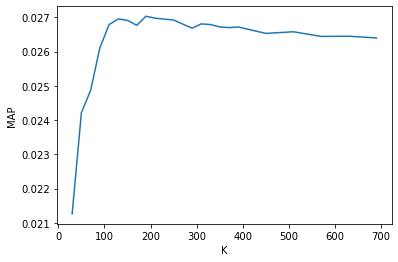

In [4]:
k_tested = [i for i in range(30,400,20)]
k1 = [i for i in range(450, 700, 60)]
k_tested = k_tested + k1
map_=[]
for k in k_tested:
    recommender_k = cf_recommender_user()
    recommender_k.fit(training, k=k, normalize=True, similarity='tanimoto')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender_k)[2])
plt.plot(k_tested, map_)
plt.ylabel('MAP')
plt.xlabel('K')
plt.show()

In [5]:
k = k_tested[np.argmax(map_)]
k

190

Similarity column 7947 ( 100 % ), 2295.67 column/sec, elapsed time 0.06 min
Similarity column 7947 ( 100 % ), 2872.16 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2898.15 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2588.99 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2775.88 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2849.08 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2813.86 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2929.87 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2757.91 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2723.94 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2853.05 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2710.13 column/sec, elapsed time 0.05 min
Similarity column 7947 ( 100 % ), 2744.37 column/sec, elapsed time 0.05 min
Similarity c

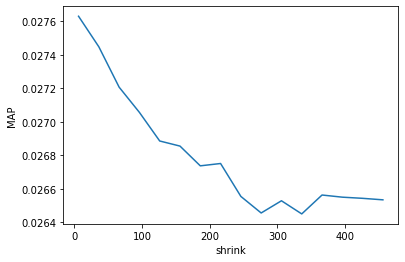

In [3]:
shrinks = [i for i in range(6,460, 30)]
map_=[]
for s in shrinks:
    recommender_shrink = cf_recommender_user()
    recommender_shrink.fit(training, k=190, shrink=s, normalize=True, similarity='tanimoto')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender_shrink)[2])
plt.plot(shrinks, map_)
plt.ylabel('MAP')
plt.xlabel('shrink')
plt.show()

In [4]:
shrink = shrinks[np.argmax(map_)]
shrink

6